**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [7]:
twoClassWekadata = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

# Head of dataset

In [4]:
twoClassWekadata.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Tail of dataset

In [5]:
twoClassWekadata.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


# Find the missing value

In [8]:
twoClassWekadata.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

# Display datatypes

In [9]:
twoClassWekadata.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

# Distribution of different classes for pelvic_radius

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D944655780>,
      dtype=object)

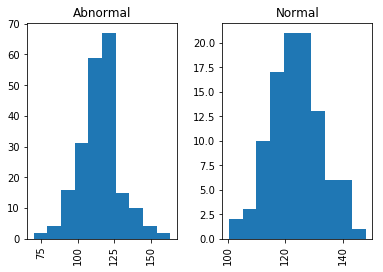

In [10]:
twoClassWekadata.hist(by='class',column = 'pelvic_radius')

# Distribution of different classes for sacral_slope

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FABBE89B0>,
      dtype=object)

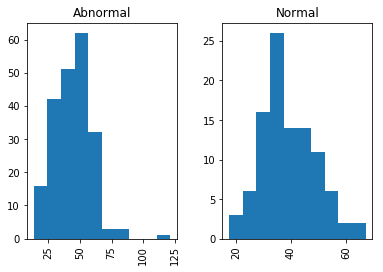

In [133]:
twoClassWekadata.hist(by='class',column = 'sacral_slope')

# Display unique values of class values

In [140]:
print(twoClassWekadata["class"].unique())

['Abnormal' 'Normal']


# Distribution of class values and other attributes via pairplot

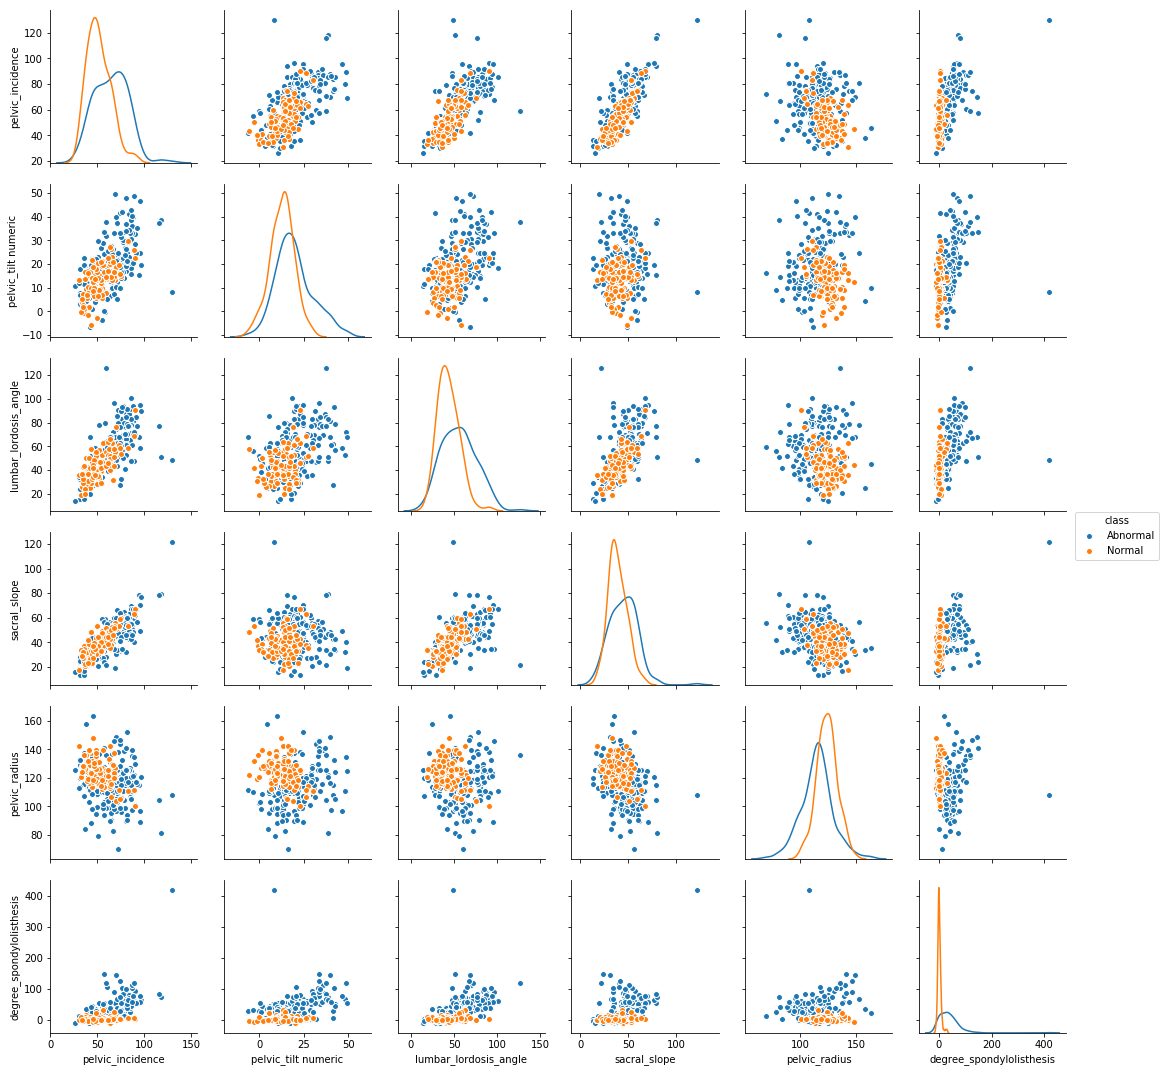

In [28]:
sns.pairplot(data=twoClassWekadata, diag_kind="kde", hue="class")

# Encode the Class variable to integer.

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
twoClassWekadata["class"] = le.fit_transform(twoClassWekadata["class"])

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split

In [15]:
X=twoClassWekadata.drop('class', axis=1)

In [16]:
Y=twoClassWekadata[["class"]]

# Normalize your Data (X) to get values between 0 to 1.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()
sc.fit(X)
scaledX = sc.transform(X)

# Split the data as train and test with a ratio of 70:30.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(scaledX, Y, test_size=0.30, random_state=42)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [20]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,Y_train)
print("Training Accuracy")
print(knc.score(X_train,Y_train))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training Accuracy
0.9124423963133641


In [105]:
Y_pred = knc.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [21]:
print("Testing Accuracy")
print(knc.score(X_test,Y_test))

Testing Accuracy
0.7956989247311828


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [22]:
knc = KNeighborsClassifier(n_neighbors=5)

In [23]:
knc.fit(X_train,Y_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
print("Testing Accuracy")
print(knc.score(X_test,Y_test))

Testing Accuracy
0.7849462365591398


# Conclusion : Tried with values of k > 3, but testing accuracy was less than 79.5%, which means that best K value for this classification is 3

# Calculate the Test Accuracy using Logistic regression, another classification algorithm

In [25]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("Training Accuracy")
print(lr.score(X_train,Y_train))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy
0.8433179723502304


In [26]:
print("Testing Accuracy")
print(lr.score(X_test,Y_test))

Testing Accuracy
0.9139784946236559


# Conclusion: Logistic regression algorithm seems to be underfit, but the testing accuracy is significantly up to 91% from 79.5% in kNN algorithm

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [27]:
threeClassWekadata = pd.read_csv("3Classdata.csv")

Explore the data set.Get necessary information about the data. Look at the head and tail of dataset. Find the missing value. Look at the unique values of class values. Look at the distribution of class values and other attributes. Get the datatype information about the dataset Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

# Head of dataset

In [28]:
threeClassWekadata.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


# Tail of dataset

In [29]:
threeClassWekadata.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


# Find the missing value

In [30]:
threeClassWekadata.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

# Display datatypes

In [31]:
threeClassWekadata.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

# Distribution of different classes for pelvic_radius

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9459365F8>,
      dtype=object)

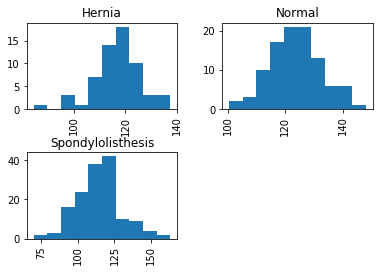

In [32]:
threeClassWekadata.hist(by='class',column = 'pelvic_radius')

# Distribution of different classes for sacral_slope

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D945CCD278>,
      dtype=object)

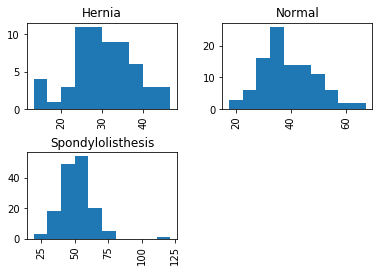

In [33]:
threeClassWekadata.hist(by='class',column = 'sacral_slope')

# Display unique values of class values

In [35]:
print(threeClassWekadata["class"].unique())

['Hernia' 'Spondylolisthesis' 'Normal']


# Distribution of class values and other attributes via pairplot

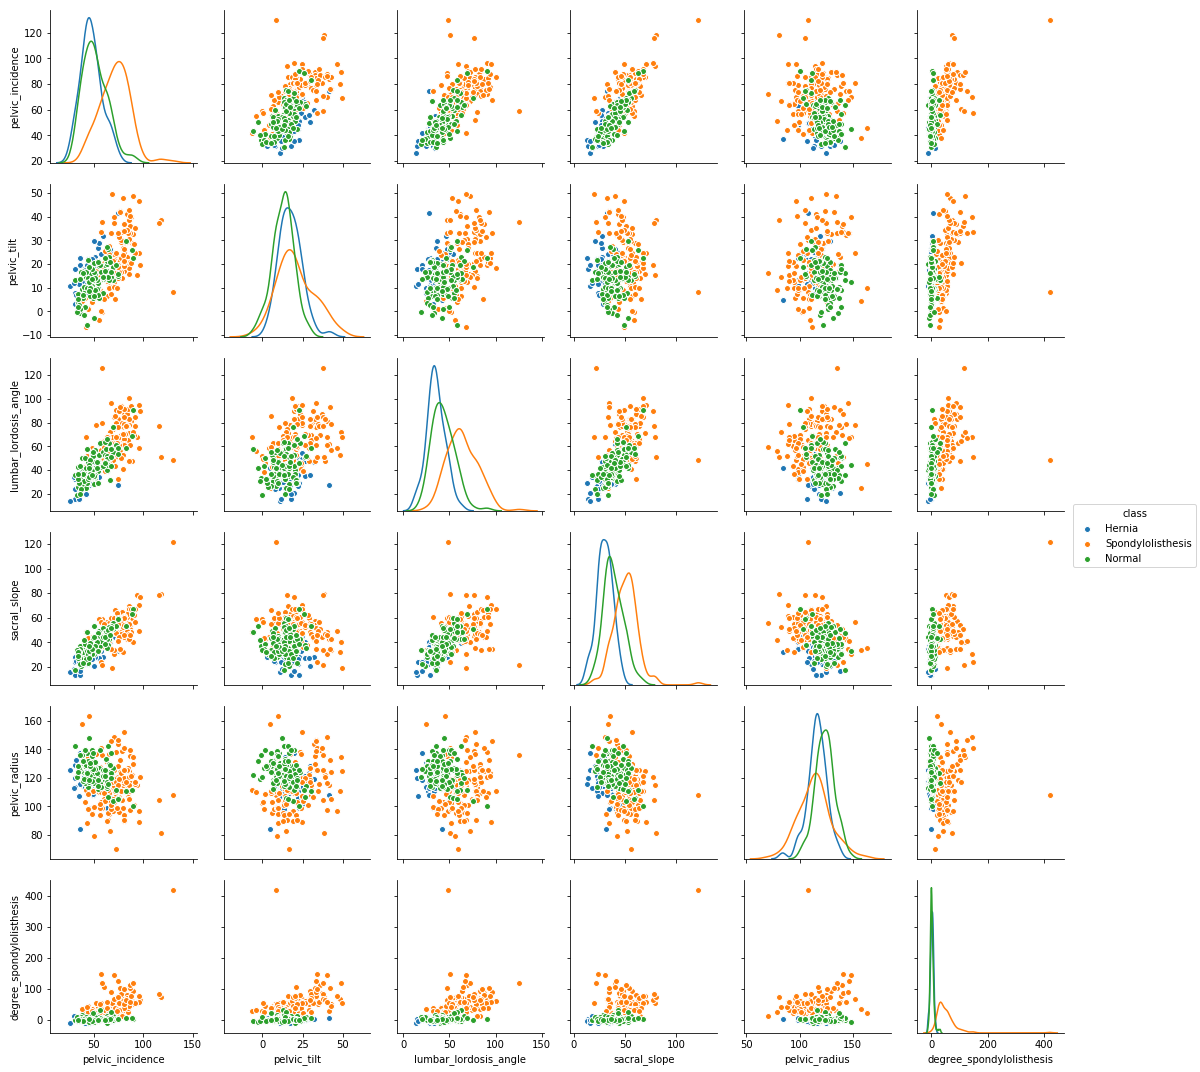

In [36]:
sns.pairplot(data=threeClassWekadata, diag_kind="kde", hue="class")

# Encode the Class variable to integer.

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [44]:
threeClassWekadata["class"] = le.fit_transform(threeClassWekadata["class"])

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split

In [46]:
X=threeClassWekadata.drop('class', axis=1)

In [47]:
Y=threeClassWekadata[["class"]]

# Normalize your Data (X) to get values between 0 to 1.

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
sc.fit(X)
scaledX = sc.transform(X)

# Split the data as train and test with a ratio of 70:30.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(scaledX, Y, test_size=0.30, random_state=42)

# Build the KNN model using Train Dataset and predict the class on test dataset

In [65]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,Y_train)
print("Training Accuracy")
print(knc.score(X_train,Y_train))

Training Accuracy
0.8940092165898618


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [52]:
Y_pred = knc.predict(X_test)

# Calculate the performance score of of your classification on test dataset.

In [66]:
print("Testing Accuracy")
print(knc.score(X_test,Y_test))

Testing Accuracy
0.7741935483870968


# What is the best K value for your classifcation? Find at which k value you get the best score.

In [91]:
knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(X_train,Y_train)
print("Training Accuracy")
print(knc.score(X_train,Y_train))

Training Accuracy
0.847926267281106


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [92]:
print("Testing Accuracy")
print(knc.score(X_test,Y_test))

Testing Accuracy
0.7849462365591398


# Conclusion : Tried with values of k > 4, but testing accuracy was less than 78.4%, which means that best K value for this classification is 4

# Calculate the Test Accuracy using Logistic regression, another classification algorithm

In [93]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("Training Accuracy")
print(lr.score(X_train,Y_train))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy
0.8571428571428571


In [94]:
print("Testing Accuracy")
print(lr.score(X_test,Y_test))

Testing Accuracy
0.8387096774193549


# Conclusion: Logistic regression algorithm seems to be slightly underfit, but the testing accuracy is significantly up to 84% from 78% in kNN algorithm